#REGRESIÓN LOGÍSTICA CON SKLEARN

---
Este proyecto, busca analizar la condición de compra realizadas por distintas personas segmentadas por sexo, edad y salario estimado.

OBJETIVO

Crear un modelo de regresión logística capaz de clasificar a las personas en función de su probabilidad de compra.

VARIABLES

*   USER ID: Número de usuario asignado por la plataforma.
*   GENDER: Género del usuario (Masculino o Femenino)
*   AGE: Edad del usuario
*   ESTIMATEDSALARY: Sueldo estimado del usuario.
*   PURCHASED: Compra (Si o No)



#####IMPORTAR EL DATASET DE KAGGLE

El dataset con el que se trabajará en este análisis está obtenido de Kaggle (https://www.kaggle.com/datasets/rakeshrau/social-network-ads).*texto en cursiva*

In [2]:
# Se comienza importando las librerias de NUMPY y PANDAS, con las que se trabajará el dataset.
import pandas as pd
import numpy as np

In [3]:
# El dataset ha sido cargado en la carpeta de Google Drive.
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/DATASET/Social_Network_Ads.csv')

ANÁLISIS DESCRIPTIVO

In [20]:
# El dataset cuenta con 400 registros y 5 columnas, siendo 4 de tipo numérica y una categórica.
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   User ID          400 non-null    int64 
 1   Gender           400 non-null    object
 2   Age              400 non-null    int64 
 3   EstimatedSalary  400 non-null    int64 
 4   Purchased        400 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 15.8+ KB


In [17]:
df.describe()
# La edad de los usuarios del análisis está en el rango de 18 a 60 años y su media es de 37 años. El rango salarial está entre 15.000 a 150.000 y su media es de 69.742.

,User ID,Age,EstimatedSalary,Purchased
count,4.000000e+02,400.000000,400.000000,400.000000
mean,1.569154e+07,37.655000,69742.500000,0.357500
std,7.165832e+04,10.482877,34096.960282,0.479864
min,1.556669e+07,18.000000,15000.000000,0.000000
25%,1.562676e+07,29.750000,43000.000000,0.000000
50%,1.569434e+07,37.000000,70000.000000,0.000000
75%,1.575036e+07,46.000000,88000.000000,1.000000
max,1.581524e+07,60.000000,150000.000000,1.000000


In [7]:
# El dataset no cuenta con datos nulos, por lo que no es necesario realiza un preprocesamiento en este apartado.
df.isnull().sum()

User ID            0
Gender             0
Age                0
EstimatedSalary    0
Purchased          0
dtype: int64

In [8]:
# Análisis para comprobar si PURCHASED es válido para la creación del modelo.
np.average(df.Purchased)
# De los 400 registros, un 35.75% de ellos realizo efectivamente una compra. Este dato indica que la variable PURCHASED es apta para el modelo.


0.3575

In [9]:
# Usando la función ILOC, acotamos el Dataframe, eliminando la columna USERID y GENDER, ya que no serán usadas en el modelo.
x = df.iloc[:,[2,3]].values # Se usa AGE y STIMATEDSALARY
y = df.iloc[:,4].values # Se usa PURCHASED

##OBTENCIÓN DE DATA PARA TRAIN Y TEST USANDO SKLEARN



In [10]:
# Importamos la librería SKLEARN y el modelo de selección de train test. Esto permite obtener la data para testeo y entrenamiento.
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size = 0.3, random_state = 0)

##ESCALADO DE VARIABLES DEL DATAFRAME.

In [11]:
# Usando SKLEARN se usa STANDARDSCALER para escalar el dataframe a numéros similares para la creación del modelo.
from sklearn.preprocessing import StandardScaler
standard_x = StandardScaler()
x_train = standard_x.fit_transform(x_train)
x_test = standard_x.fit_transform(x_test)

##ENTRENAMIENTO DEL MODELO DE REGRESIÓN LOGÍSTICA



In [12]:
#Ajuste del modelo
from sklearn.linear_model import LogisticRegression
reg = LogisticRegression(random_state = 0) # Se usa random state para que entrene con numeros aleatorios del dataset.
reg.fit(x_train,y_train)

#Predicción
pred = reg.predict(x_test)

##EVALUACIÓN DEL MODELO DE REGRESIÓN LOGÍSTICA

In [13]:
pred,y_test

(array([0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1,
        0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
        1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1,
        0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1,
        0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0,
        0, 0, 1, 1, 1, 1, 1, 0, 1, 1]),
 array([0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1,
        0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
        1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1,
        0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1,
        1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0,
        0, 0, 1, 1, 1, 0, 1, 0, 0, 1]))

In [14]:
#Matriz de confusión
from sklearn.metrics import confusion_matrix
conf_mat = confusion_matrix(y_test,pred)
conf_mat

array([[75,  4],
       [ 9, 32]])

In [22]:
75/len(y_test)
# El modelo según la matriz de confusión, tiene un 62,5% de precisión, por lo tanto se considera bueno.

0.625

###CREACIÓN DE VISUALIZACIÓN CON MATPLOTLIB

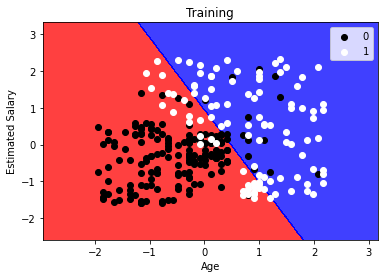

In [16]:
# Se crea un gráfico de colores.
from matplotlib.colors import ListedColormap
import matplotlib.pyplot as plt
X_set, y_set = x_train, y_train
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 1, stop = X_set[:, 0].max() + 1, step = 0.01),
                     np.arange(start = X_set[:, 1].min() - 1, stop = X_set[:, 1].max() + 1, step = 0.01))
plt.contourf(X1, X2, reg.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
             alpha = 0.75, cmap = ListedColormap(('red', 'blue')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
                c = ListedColormap(('black', 'white'))(i), label = j)
plt.title('Training')
plt.xlabel('Age')
plt.ylabel('Estimated Salary')
plt.legend()
plt.show()

### CONCLUSIÓN

---

El modelo de regresión logística obtenido, ha sido capaz de clasificar con un 62,5% de confianza el comportamiento de los usuarios analizados en la muestra, en donde el sector de color azul agrupa los usuarios que efectivamente compraron, y el sector rojo los que no compraron. Los puntos de color negro (0) indican NO COMPRA y el color blanco (1) indican SI COMPRA. Por lo tanto, en el gráfico se aprecia la distribución de los puntos en función de su compra del dataset en train y test.
